<a href="https://colab.research.google.com/github/zebedy-magic/BottleImageRecognition/blob/master/Bottle_recognition_part2_process_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 2 -preprocess images **

This is going to be where we will preprocess the images before sendin into machine learning algoritm

The steps will be documented here as I go along 

1.   grayscale
2.   find boundaries 





In [0]:
from os import listdir
from os.path import isfile, join
#ROOT DIRECTORY
root='/content/drive/My Drive/'

import numpy as np
# Used to change filepaths
from pathlib import Path

# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# import numpy to use in this cell
import numpy as np

# import Image from PIL so we can use it later
from PIL import Image

#path to images 
path=join(root,'images')


# Useful functions

In [0]:
def get_filenames(path):
  
  filenames=[f for f in listdir(path=path) if isfile(join(path,f))]
  return filenames


def save_dictionary_csv(path,dictionary):

  import csv 
  
  with open(join(path,'labels.csv'), 'w', newline='') as csvfile:
    writer=csv.writer(csvfile, delimiter=',')
    for key,item in dictionary.items():
      writer.writerow([key,item])

  


# Lets do some testing 

In [0]:
#lets get an image and have a look

img=Image.open('/content/drive/My Drive/images/2020-04-24 07:45:00.094734')
print(img.size)

#lets resize the images to 100,100
#we could scale this but for now lets not care for test purposes 
img_resize=img.resize((200,200),Image.BICUBIC)


#do we need color ? Maybe if we wanted to identify syngenta bottles or we wanted only white bottles
#Lets test with just gray_scale as this cuts out the RGB channels 
img_gray=img_resize.convert("L")
display(img_gray)

#lets increase the contrast 
img_gray_arr=np.array(img_gray)
img_gray_hc_arr=np.maximum(img_gray_arr,100)

img_gray_hc=Image.fromarray(img_gray_hc_arr)
display(img_gray_hc)

FileNotFoundError: ignored

#  Pipeline to process images

In [0]:
def process_images(path):

  dic_image_name={}

  for imagename in get_filenames(path):

    #open the image
    #but first check if it is an imagefile
    try:
      img=Image.open(join(path, imagename))
    except IOError:
      print('The image {0} could not be opened and is probably not an imagefile'.format(imagename))  

    #sort out the path to save image  
    save_path=join(path,'processed',imagename)

    #lets resize the images to 100,100
    #we could scale this but for now lets not care for test purposes 
    img_resize=img.resize((200,200),Image.BICUBIC)


    #do we need color ? Maybe if we wanted to identify syngenta bottles or we wanted only white bottles
    #Lets test with just gray_scale as this cuts out the RGB channels 
    img_gray=img_resize.convert("L")
    display(img_gray)

    #lets increase the contrast 
    img_gray_arr=np.array(img_gray)
    img_gray_hc_arr=np.maximum(img_gray_arr,100)
    img_gray_hc=Image.fromarray(img_gray_hc_arr)

    #save the image 
    img_gray_hc.save(save_path)
    print('The image {0} has been saved at {1}'.format(imagename,save_path) )

    #Save the file names in a list use 0 as default label (not a bottle)
    dic_image_name[imagename]=0

  return dic_image_name

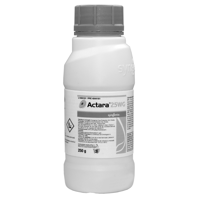

The image 2020-04-25 12:01:24.739043.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:01:24.739043.jpeg


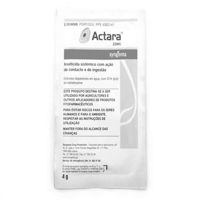

The image 2020-04-25 12:01:26.103276.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:01:26.103276.jpeg


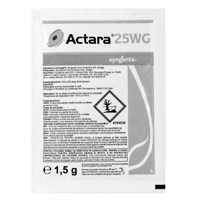

The image 2020-04-25 12:01:27.977304.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:01:27.977304.jpeg


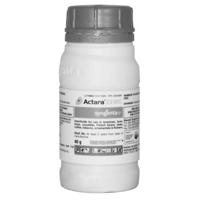

The image 2020-04-25 12:01:29.199803.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:01:29.199803.jpeg


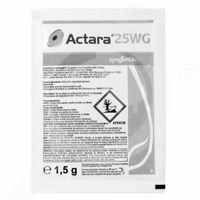

The image 2020-04-25 12:01:30.760437.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:01:30.760437.jpeg


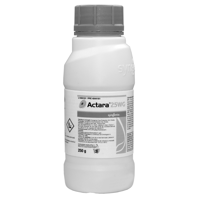

The image 2020-04-25 12:03:23.456382.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:03:23.456382.jpeg


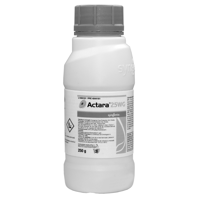

The image 2020-04-25 12:04:48.464446.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:04:48.464446.jpeg


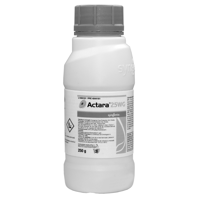

The image 2020-04-25 12:05:11.305463.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:11.305463.jpeg


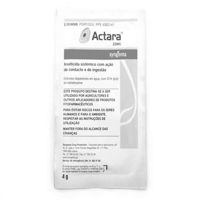

The image 2020-04-25 12:05:12.395336.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:12.395336.jpeg


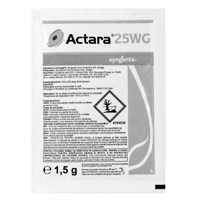

The image 2020-04-25 12:05:14.270377.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:14.270377.jpeg


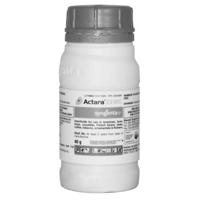

The image 2020-04-25 12:05:15.480697.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:15.480697.jpeg


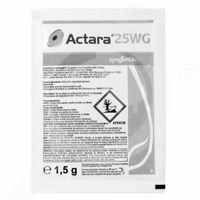

The image 2020-04-25 12:05:17.039596.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:17.039596.jpeg


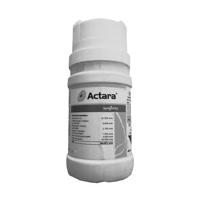

The image 2020-04-25 12:05:18.453151.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:18.453151.jpeg


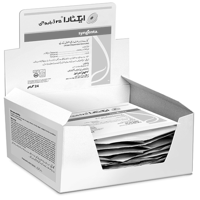

The image 2020-04-25 12:05:20.357636.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:20.357636.jpeg


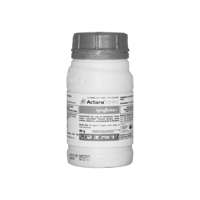

The image 2020-04-25 12:05:21.652581.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:21.652581.jpeg
The image 2020-04-25 12:05:22.724023.jpeg could not be opened and is probably not an imagefile


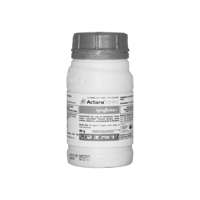

The image 2020-04-25 12:05:22.724023.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-25 12:05:22.724023.jpeg


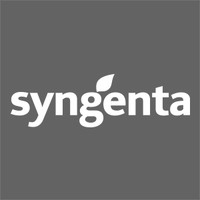

The image 2020-04-26 10:38:24.221982.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:24.221982.jpeg


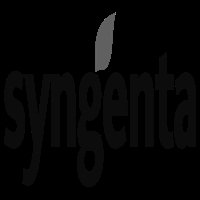

The image 2020-04-26 10:38:23.190688.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:23.190688.jpeg


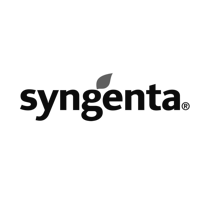

The image 2020-04-26 10:38:20.898145.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:20.898145.jpeg


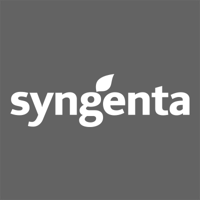

The image 2020-04-26 10:38:17.041913.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:17.041913.jpeg


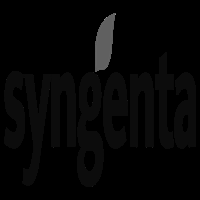

The image 2020-04-26 10:38:29.169433.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:29.169433.jpeg


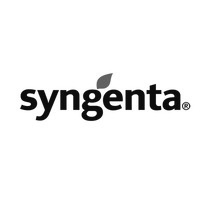

The image 2020-04-26 10:38:30.550885.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:30.550885.jpeg


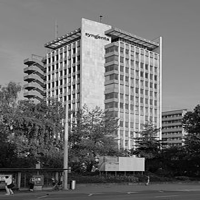

The image 2020-04-26 10:38:25.605599.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:25.605599.jpeg
The image 2020-04-26 10:38:31.630673.jpeg could not be opened and is probably not an imagefile


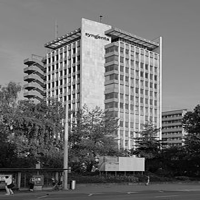

The image 2020-04-26 10:38:31.630673.jpeg has been saved at /content/drive/My Drive/images/processed/2020-04-26 10:38:31.630673.jpeg


In [0]:

#process the images 
dic_imageName = process_images(path)

#save the dictionary with image names 
save_dictionary_csv(root,dic_imageName)
